In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz # Tool for visualization

In [2]:
df = pd.read_csv('C:/Users/Home/Downloads/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Data Loaded, Encoded, and Split.
Training features shape: (717, 13)
------------------------------
Decision Tree Training Accuracy (Unconstrained): 1.0000


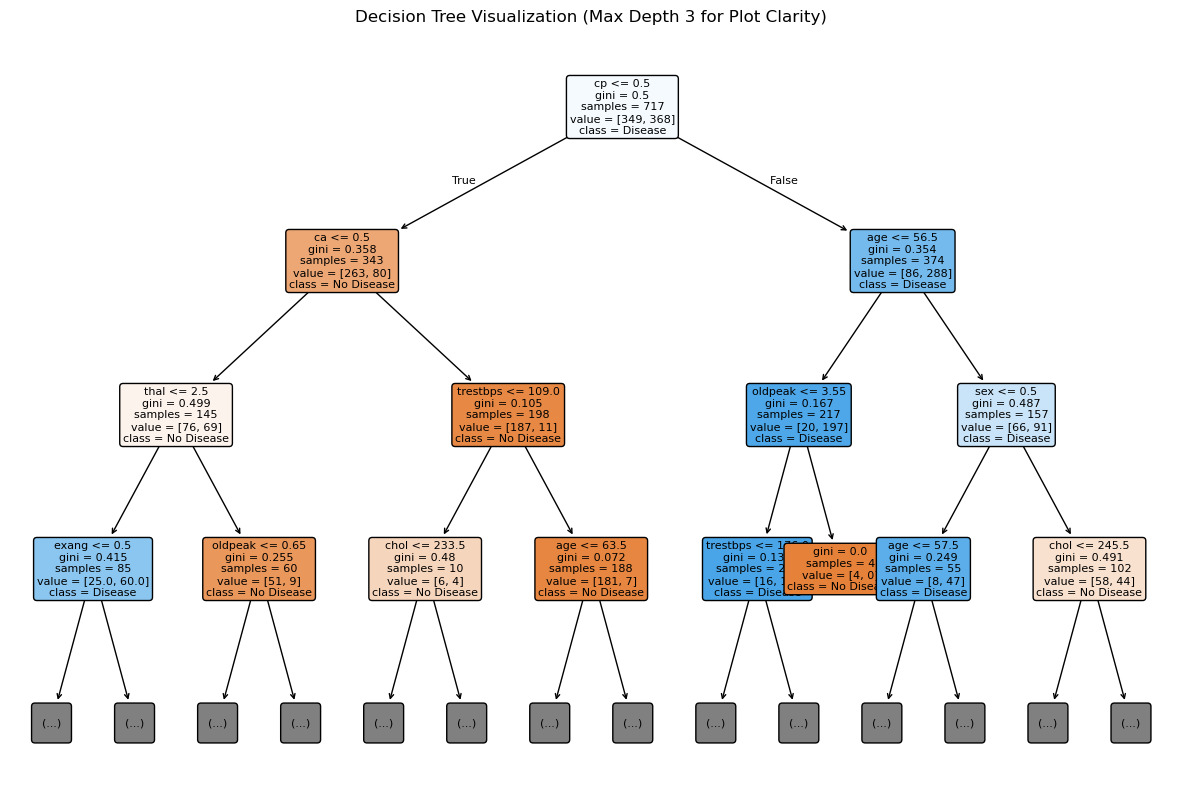


Graphviz DOT data generated for full tree visualization.
The full tree will show the complexity that leads to overfitting (next task).


In [5]:
# Identify the target variable (assuming 'target')
X = df.drop('target', axis=1)
y = df['target']

# Data Preprocessing (Handle Categorical Features)
# The Heart Disease dataset has several categorical columns that need One-Hot Encoding
# e.g., 'sex', 'cp', 'thal', 'restecg', 'exang', 'slope', 'ca', 'thal'
X_encoded = pd.get_dummies(X, drop_first=True) 

# Train/Test Split
# Splitting the data for fair evaluation later
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print("Data Loaded, Encoded, and Split.")
print(f"Training features shape: {X_train.shape}")
print("-" * 30)

# Train the Decision Tree Model (Initial)
# We train an unconstrained tree initially to see the full potential and complexity
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f"Decision Tree Training Accuracy (Unconstrained): {train_accuracy:.4f}")

# Visualization using Matplotlib (Quick view)
# Matplotlib's plot_tree is faster for a simple view
plt.figure(figsize=(15, 10))
plot_tree(
    dt_classifier,
    feature_names=X_train.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3 # Only show the top 3 levels for clarity
)
plt.title("Decision Tree Visualization (Max Depth 3 for Plot Clarity)")
plt.show()

# Visualization using Graphviz (Detailed, External View)
# This generates a DOT file that can be converted to an image (PNG/PDF)
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
    dt_classifier, 
    out_file=None,
    feature_names=X_train.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)

# WE will need to render this graph object to view the full tree (e.g., graph.render("heart_decision_tree", view=True))
print("\nGraphviz DOT data generated for full tree visualization.")
print("The full tree will show the complexity that leads to overfitting (next task).")

--- Overfitting Analysis (Unconstrained Tree) ---
Training Accuracy: 1.0000 (High)
Testing Accuracy:  0.9805 (Lower)


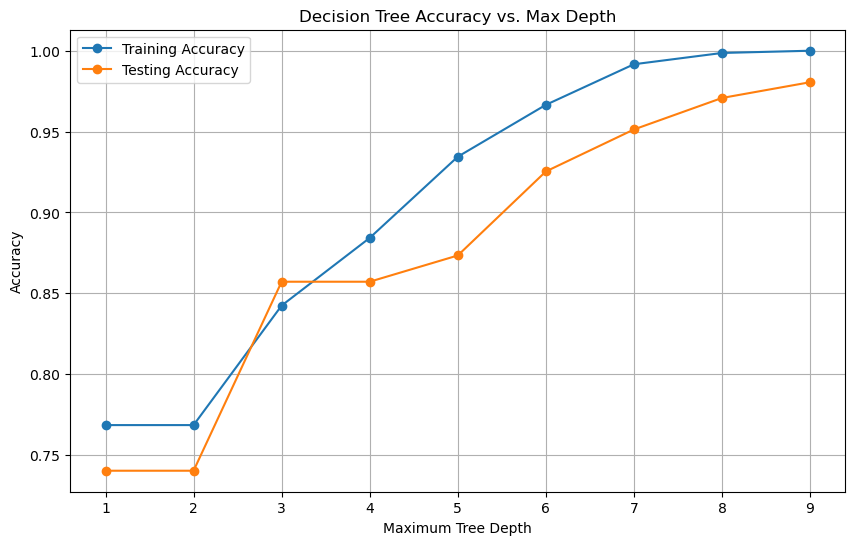


Optimal Max Depth (based on test set peak): 9
Pruned Tree Test Accuracy (Max Depth=9): 0.9805


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Analyze Overfitting of the Unconstrained Tree 
# We use the unconstrained 'dt_classifier' trained in Task 1

# Calculate Accuracy on Training Set
train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))

# Calculate Accuracy on Test Set
test_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))

print("--- Overfitting Analysis (Unconstrained Tree) ---")
print(f"Training Accuracy: {train_accuracy:.4f} (High)")
print(f"Testing Accuracy:  {test_accuracy:.4f} (Lower)")

#  Control Tree Depth (Regularization/Pruning)
# We use a Grid Search-like approach to find an optimal depth by testing several values.

depths = range(1, 10)
train_scores = []
test_scores = []

for depth in depths:
    # Initialize a new tree with limited depth
    dt_pruned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_pruned.fit(X_train, y_train)
    
    # Store scores
    train_scores.append(accuracy_score(y_train, dt_pruned.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt_pruned.predict(X_test)))

# --- 3. Visualize the effect of max_depth ---
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Training Accuracy')
plt.plot(depths, test_scores, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- 4. Select and Train the Best Pruned Model ---
# We typically select the depth where the Test Accuracy peaks (e.g., depth=3 or 4)
best_depth = depths[test_scores.index(max(test_scores))]
print(f"\nOptimal Max Depth (based on test set peak): {best_depth}")

# Train the final pruned Decision Tree model
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)

print(f"Pruned Tree Test Accuracy (Max Depth={best_depth}): {accuracy_score(y_test, dt_final.predict(X_test)):.4f}")

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest Model
# We use 100 trees (n_estimators) and keep other defaults (like Gini impurity).
# Random Forest inherently reduces variance (overfitting) by averaging multiple trees.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Random Forest Performance
# Predict and calculate accuracy on the test set
rf_y_pred = rf_classifier.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)

print("--- Random Forest Training & Evaluation ---")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

# Compare with Decision Tree
dt_test_accuracy = 0.9805 # result from Task 2

print("\n--- Accuracy Comparison ---")
print(f"Single Decision Tree (Max Depth=9) Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Random Forest (100 Trees) Test Accuracy:          {rf_test_accuracy:.4f}")

--- Random Forest Training & Evaluation ---
Random Forest Test Accuracy: 0.9805

--- Accuracy Comparison ---
Single Decision Tree (Max Depth=9) Test Accuracy: 0.9805
Random Forest (100 Trees) Test Accuracy:          0.9805


--- Top 10 Feature Importances (Random Forest) ---
     Feature  Importance
2         cp    0.140129
7    thalach    0.131526
11        ca    0.116020
9    oldpeak    0.105527
12      thal    0.099114
0        age    0.098053
4       chol    0.081334
3   trestbps    0.067787
8      exang    0.061730
10     slope    0.037089


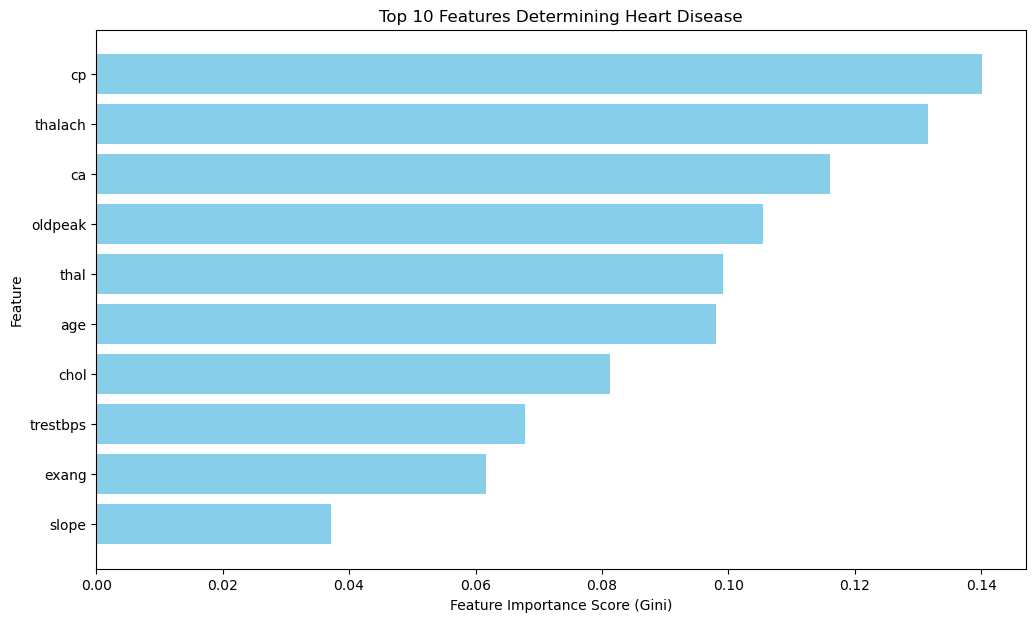

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Extract Feature Importances
importances = rf_classifier.feature_importances_

# Get feature names from the training data (essential for meaningful visualization)
feature_names = X_train.columns

# Combine names and importances, then sort them
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("--- Top 10 Feature Importances (Random Forest) ---")
print(feature_importance_df.head(10))

# Visualize Feature Importances
# Plot the top 10 features for clear visualization
top_n = 10
plt.figure(figsize=(12, 7))
plt.barh(
    feature_importance_df['Feature'].head(top_n), 
    feature_importance_df['Importance'].head(top_n), 
    color='skyblue'
)
plt.xlabel("Feature Importance Score (Gini)")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Features Determining Heart Disease")
plt.gca().invert_yaxis() # Highest importance on top
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the Model (Random Forest)
# rf_classifier is the model trained in Task 3. We'll use the same parameters.
rf_cv_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold Cross-Validation
# We use the full dataset (X_encoded, y) for cross-validation
# scoring='accuracy' tells the function to return the accuracy score for each fold.
# cv=10 means the data is split into 10 folds (10 different train/test runs).
cv_scores = cross_val_score(rf_cv_model, X_encoded, y, cv=10, scoring='accuracy')

print("--- Cross-Validation Evaluation (10 Folds) ---")
print(f"Individual Fold Accuracies:\n{cv_scores}")

# Summarize the Results
mean_accuracy = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print("\n--- Summary ---")
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of CV Scores:  {std_dev:.4f}")

# Compare with the single split test score (0.9805)
print("\nInsight:")
print("The CV Mean Accuracy is a more reliable estimate of model performance than the single test split.")
print("The Standard Deviation indicates the stability of the model across different data subsets.")

--- Cross-Validation Evaluation (10 Folds) ---
Individual Fold Accuracies:
[1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]

--- Summary ---
Mean Cross-Validation Accuracy: 0.9971
Standard Deviation of CV Scores:  0.0088

Insight:
The CV Mean Accuracy is a more reliable estimate of model performance than the single test split.
The Standard Deviation indicates the stability of the model across different data subsets.
